# Graphs

Prepare the imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.optimize import curve_fit

In [39]:
%matplotlib widget

Load the data

In [40]:
armadillos = np.loadtxt('data/armadillo.tsv', delimiter='\t')
crabs = np.loadtxt('data/crab.tsv', delimiter='\t')
crocs = np.loadtxt('data/croc.tsv', delimiter='\t')
frogs = np.loadtxt('data/frog.tsv', delimiter='\t')
goos = np.loadtxt('data/goo.tsv', delimiter='\t')
osnakes = np.loadtxt('data/osnake.tsv', delimiter='\t')
snakes = np.loadtxt('data/snake.tsv', delimiter='\t')
spiders = np.loadtxt('data/spider.tsv', delimiter='\t')
tortoises = np.loadtxt('data/tortoise.tsv', delimiter='\t')

Add HP and XP columns

In [41]:
armadillos = np.column_stack((armadillos, np.full((armadillos.shape[0], 1), 1600)))
crabs = np.column_stack((crabs, np.full((crabs.shape[0], 1), 400)))
crocs = np.column_stack((crocs, np.full((crocs.shape[0], 1), 3200)))
frogs = np.column_stack((frogs, np.full((frogs.shape[0], 1), 600)))
goos = np.column_stack((goos, np.full((goos.shape[0], 1), 100)))
osnakes = np.column_stack((osnakes, np.full((osnakes.shape[0], 1), 720)))
snakes = np.column_stack((snakes, np.full((snakes.shape[0], 1), 720)))
spiders = np.column_stack((spiders, np.full((spiders.shape[0], 1), 18000)))
tortoises = np.column_stack((tortoises, np.full((tortoises.shape[0], 1), 7200)))

Prepare the graph

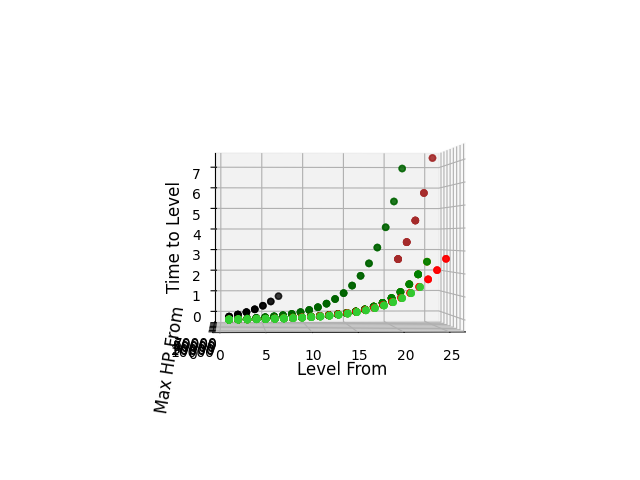

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(0, 267, 0)
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(frogs[:, 1], frogs[:, 3], frogs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')
ax.scatter3D(spiders[:, 1], spiders[:, 3], spiders[:, 0], color='black')
ax.scatter3D(tortoises[:, 1], tortoises[:, 3], tortoises[:, 0], color='teal')

plt.show()

Find a function that fits

In [43]:
def f(X, a, b, c, d, e, f):
    level, hp = X
    return a + (b * level) + (c * (level ** 2)) + (d * hp) + (e * (hp ** 2)) + (f ** level)

monsters = [armadillos, crabs, crocs, frogs, goos, osnakes, snakes, spiders, tortoises]

level = np.concatenate([data[:, 1] for data in monsters])
max_hp = np.concatenate([data[:, 3] for data in monsters])
hp = np.concatenate([data[:, 5] for data in monsters])
time_to_level = np.concatenate([data[:, 0] for data in monsters])

popt, pcov = curve_fit(f, (level, max_hp), time_to_level, bounds=(0, np.inf))

In [44]:
# popt

In [45]:
# pcov

Graph the function with the original data

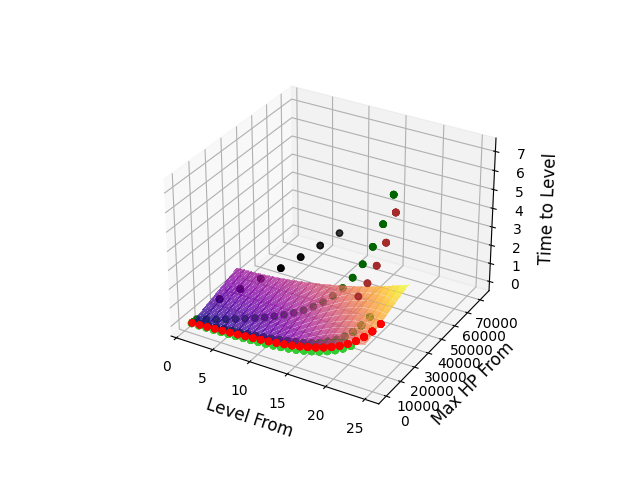

In [46]:
graph = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Level From', fontsize=12)
ax.set_ylabel('Max HP From', fontsize=12)
ax.set_zlabel('Time to Level', fontsize=12)

ax.scatter3D(armadillos[:, 1], armadillos[:, 3], armadillos[:, 0], color='brown')
ax.scatter3D(crabs[:, 1], crabs[:, 3], crabs[:, 0], color='red')
ax.scatter3D(crocs[:, 1], crocs[:, 3], crocs[:, 0], color='darkgreen')
ax.scatter3D(frogs[:, 1], frogs[:, 3], frogs[:, 0], color='darkgreen')
ax.scatter3D(goos[:, 1], goos[:, 3], goos[:, 0], color='limegreen')
ax.scatter3D(osnakes[:, 1], osnakes[:, 3], osnakes[:, 0], color='orange')
ax.scatter3D(snakes[:, 1], snakes[:, 3], snakes[:, 0], color='green')
ax.scatter3D(spiders[:, 1], spiders[:, 3], spiders[:, 0], color='black')
ax.scatter3D(tortoises[:, 1], tortoises[:, 3], tortoises[:, 0], color='teal')

LEVELS = np.arange(1, 25, 1)
MAX_HP = np.arange(100, 30000, 100)
HP = np.arange(100, 5000, 100)
X, Y = np.meshgrid(LEVELS, MAX_HP)
Z = f((X, Y), popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma, alpha=0.5, linewidth=0, antialiased=False)

plt.show()